## 적층 LSTM 모델을 이용한 영화리뷰 분류 분석

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb

### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
* IMDB 영화 리뷰 데이터 down

In [2]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


### Step 1-2. 입력 데이터의 전처리 
* LSTM 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [3]:
from tensorflow.keras.preprocessing import sequence

In [4]:
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)

In [5]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

### Step2. 적층 LSTM 모델 디자인

In [6]:
from tensorflow.keras import models, layers

In [7]:
model = models.Sequential()

In [8]:
# embedding layer: 32차원
# hidden layer : LSTM 2개[32, 16]
# dropout rate : 0.5
# output layer
model.add(layers.Embedding(input_dim=10000,
                           output_dim=32,
                           input_length=800))
model.add(layers.LSTM(units=32, return_sequences=True))
model.add(layers.GRU(units=16))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 800, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 800, 32)           8320      
_________________________________________________________________
gru (GRU)                    (None, 16)                2400      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 330,737
Trainable params: 330,737
Non-trainable params: 0
_________________________________________________________________


In [10]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
# batch size : 128, epochs : 10, validation data set percent : 20%
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 50s 267ms/step - loss: 0.5248 - accuracy: 0.7474 - val_loss: 0.3750 - val_accuracy: 0.8452
Epoch 2/10
157/157 [==============================] - 41s 261ms/step - loss: 0.2985 - accuracy: 0.8870 - val_loss: 0.4151 - val_accuracy: 0.8662
Epoch 3/10
157/157 [==============================] - 41s 262ms/step - loss: 0.2487 - accuracy: 0.9107 - val_loss: 0.2815 - val_accuracy: 0.8932
Epoch 4/10
157/157 [==============================] - 41s 261ms/step - loss: 0.2100 - accuracy: 0.9272 - val_loss: 0.4381 - val_accuracy: 0.8694
Epoch 5/10
157/157 [==============================] - 41s 261ms/step - loss: 0.1901 - accuracy: 0.9339 - val_loss: 0.3726 - val_accuracy: 0.8606
Epoch 6/10
157/157 [==============================] - 41s 262ms/step - loss: 0.1726 - accuracy: 0.9420 - val_loss: 0.3179 - val_accuracy: 0.8672
Epoch 7/10
157/157 [==============================] - 41s 261ms/step - loss: 0.1522 - accuracy: 0.9472 - val_loss: 0.3152 - val_ac

In [12]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

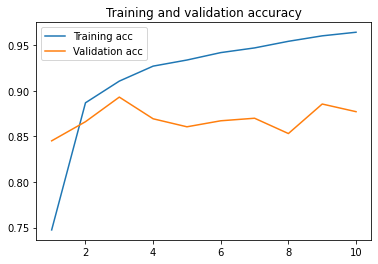

In [13]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

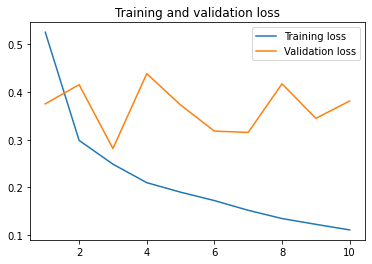

In [14]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# 테스트 데이터 셋을 통한 성능 측정
loss, acc = model.evaluate(x=input_test, y = y_test)

782/782 [==============================] - 73s 93ms/step - loss: 0.4214 - accuracy: 0.8644
